In [1]:
%pip install shapely
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import h2o
from h2o.automl import H2OAutoML
from shapely.geometry import Point
import sys 
sys.path.append("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/shared")
import test



Note: you may need to restart the kernel to use updated packages.


In [7]:
h2o.init(ip ='localhost', port = 54321)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,34 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_simenvoldqvam_7c0drd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [20]:
#importing stores_train
stores_train = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_train.csv')
stores_train = stores_train[stores_train['year']==2016]


#importing stores_test
stores_test = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_test.csv')
stores_test = stores_test[stores_test['year']==2016]

#importing stores_extra
stores_extra = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_extra.csv')
stores_extra = stores_extra[stores_extra['year']==2016]


#importing grunnkrets_age_distribution
grunnkrets_age_distribution = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_age_distribution.csv")
grunnkrets_age_distribution = grunnkrets_age_distribution[grunnkrets_age_distribution['year']==2016]
grunnkrets_age_distribution_new = grunnkrets_age_distribution.drop(['year'],axis=1)

#importing grunnkrets_norway_stripped
grunnkrets_norway_stripped = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_norway_stripped.csv")
grunnkrets_norway_stripped = grunnkrets_norway_stripped[grunnkrets_norway_stripped['year']==2016]
grunnkrets_norway_stripped_new = grunnkrets_norway_stripped.drop(['year'],axis=1)

#importing grunnkrets_households_num_persons
grunnkrets_households_num_persons = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_households_num_persons.csv")
grunnkrets_households_num_persons = grunnkrets_households_num_persons[grunnkrets_households_num_persons['year']==2016]
grunnkrets_households_num_persons_new = grunnkrets_households_num_persons.drop(['year'],axis=1)

#importing grunnkrets_income_households
grunnkrets_income_households = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_income_households.csv")
grunnkrets_income_households = grunnkrets_income_households[grunnkrets_income_households['year']==2016]
grunnkrets_income_households_new = grunnkrets_income_households.drop(['year'],axis=1)

#importing plaace_hierarchy
plaace_hierarchy = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/plaace_hierarchy.csv")




In [32]:


def make_point(stores_df):
    stores_train_new = stores_df.copy()
    stores_train_new['geometry'] = [Point(xy) for xy in zip(stores_train_new.lon, stores_train_new.lat)] 
    stores_train_point = stores_train_new[['store_id','geometry']]
    return stores_train_point

In [33]:

#change lat and long to point
point = make_point(stores_train)
test_point = make_point(stores_test)

stores_train_df=stores_train.merge(point,how='left',on='store_id')
stores_test_df=stores_test.merge(test_point,how='left',on='store_id')

stores_train_drop = stores_train_df.drop(['year','lat','lon'], axis = 1)
stores_test_drop = stores_test_df.drop(['year','lat','lon'], axis = 1)



In [27]:
stores_train_hf = h2o.H2OFrame(stores_train_drop)
stores_test_hf = h2o.H2OFrame(stores_test_drop)
#stores_extra_hf = h2o.H2OFrame(stores_extra)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
#very simple training model with h2o
x = stores_train_hf.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame= stores_train_hf) 


AutoML progress: |
13:35:49.126: _train param, Dropping bad and constant columns: [store_id, store_name]

██
13:36:00.0: _train param, Dropping bad and constant columns: [store_id, store_name]

███
13:36:20.179: GLM_1_AutoML_1_20221109_133549 [GLM def_1] failed: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
13:36:20.937: _train param, Dropping bad and constant columns: [store_id, store_name]
13:36:25.930: _train param, Dropping bad and constant columns: [store_id, store_name]

█
13:36:32.226: _train param, Dropping bad and constant columns: [store_id, store_name]

███
13:37:10.626: _train param, Dropping bad and constant columns: [store_id, store_name]
13:37:12.799: _train param, Dropping bad and constant columns: [store_id, store_name]


13:37:15.340: _train param, Dropping bad and constant columns: [store_id, store_name]

█
13:37:18.992: _train param, Dropping bad and constant columns: [store_id, store_name]

██
1

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,4.7385483,0.1488002,4.740272,4.538162,4.781818,4.947513,4.684977
mean_residual_deviance,93.459724,14.932049,83.723854,73.65374,98.2958,111.9861450,99.63909
mse,93.459724,14.932049,83.723854,73.65374,98.2958,111.9861450,99.63909
null_deviance,608293.75,101893.8750000,676270.8,468778.75,578255.2,734523.75,583640.25
r2,0.6019400,0.0452630,0.6754029,0.5927792,0.5542838,0.6059578,0.5812765
residual_deviance,240152.12,37521.977,219356.5,190321.27,257731.58,289036.22,244315.06
rmse,9.642193,0.7809049,9.150074,8.582176,9.914424,10.582351,9.981938
rmsle,0.8037389,0.0180624,0.7840006,0.8287897,0.8149307,0.7991206,0.7918531


In [24]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
best_model = aml.get_best_model()

lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20221109_123848,9.69625,94.0173,4.74455,nan,94.0173,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20221109_123848,9.70627,94.2116,4.7387,nan,94.2116,StackedEnsemble
GBM_1_AutoML_2_20221109_123848,9.83982,96.8221,4.79954,nan,96.8221,GBM
GBM_2_AutoML_2_20221109_123848,9.91946,98.3957,4.76374,nan,98.3957,GBM
DRF_1_AutoML_2_20221109_123848,10.0186,100.372,4.69861,0.779827,100.372,DRF
XGBoost_2_AutoML_2_20221109_123848,10.1643,103.313,5.01574,nan,103.313,XGBoost
XGBoost_1_AutoML_2_20221109_123848,10.2444,104.948,5.18928,nan,104.948,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

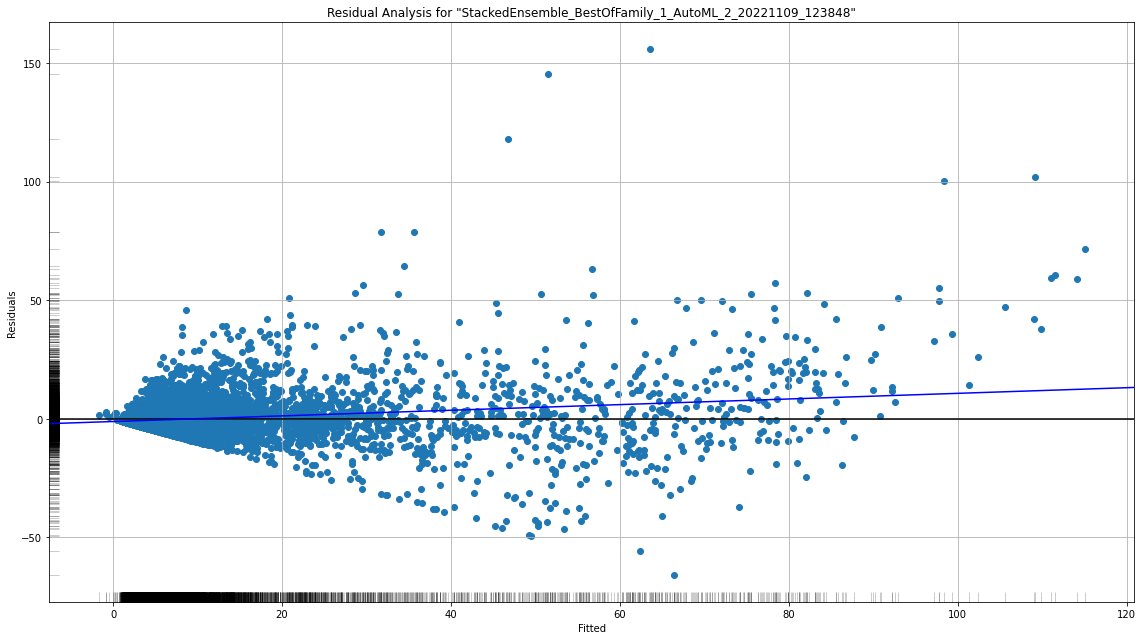

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

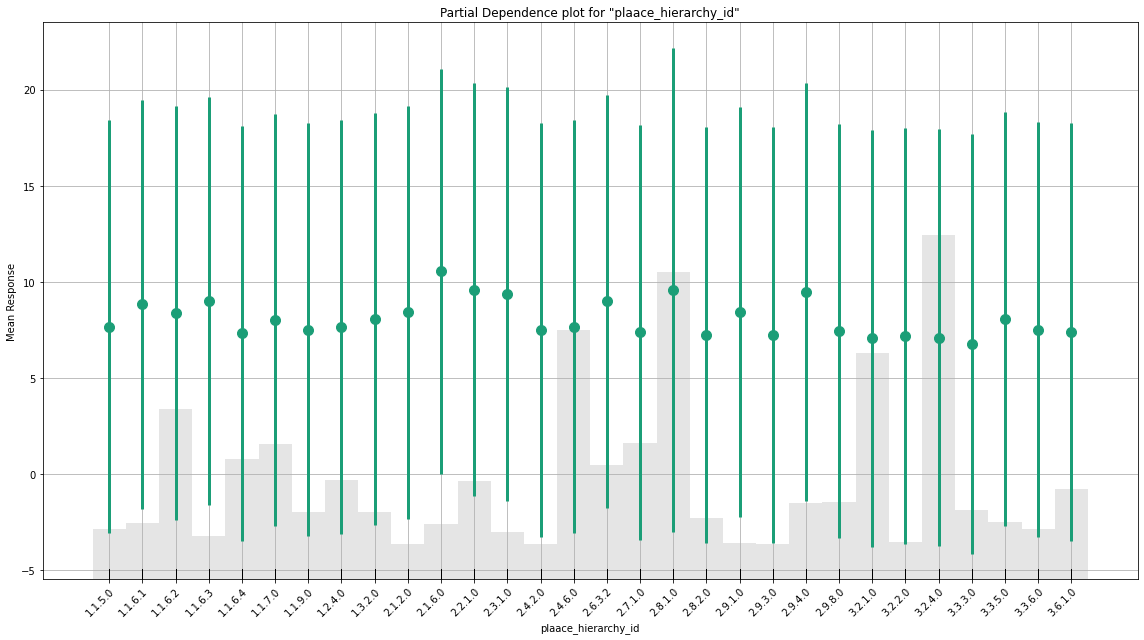

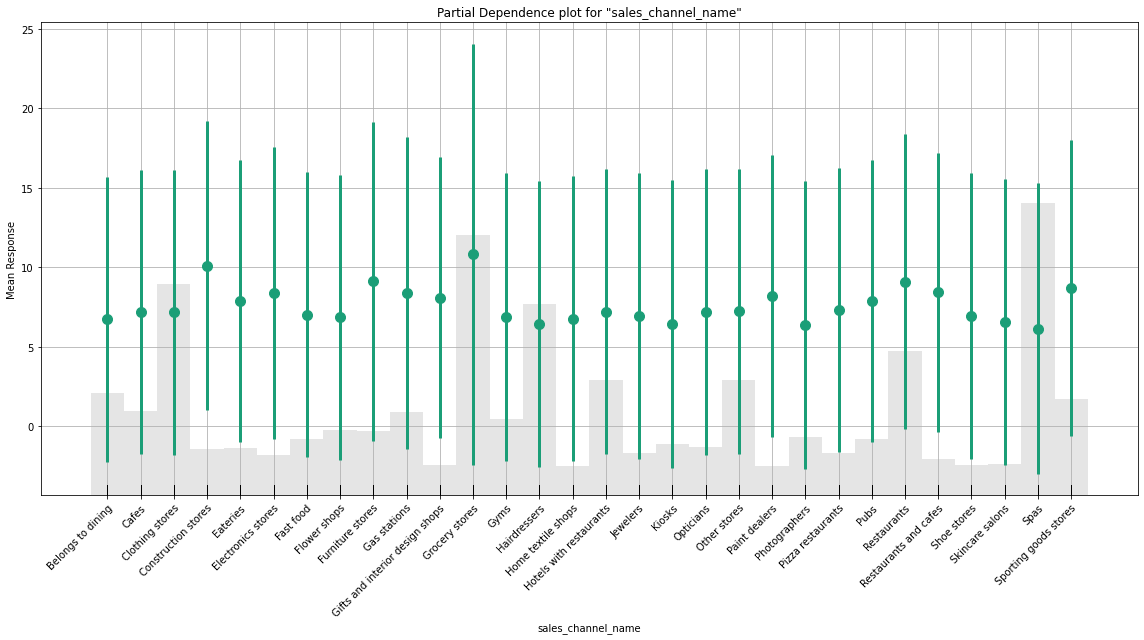

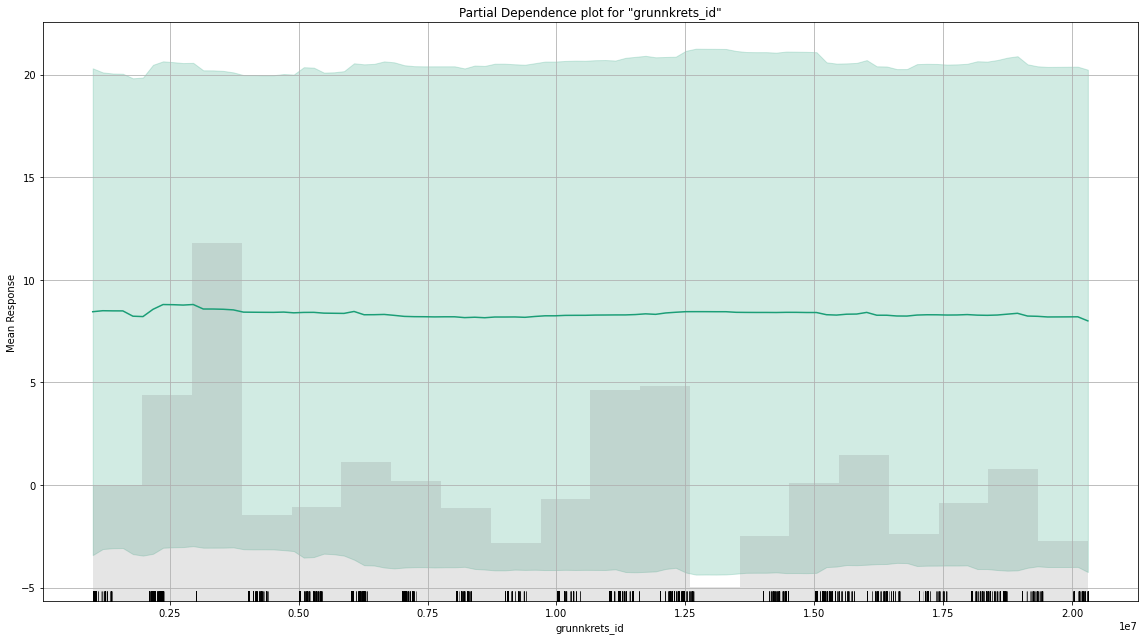

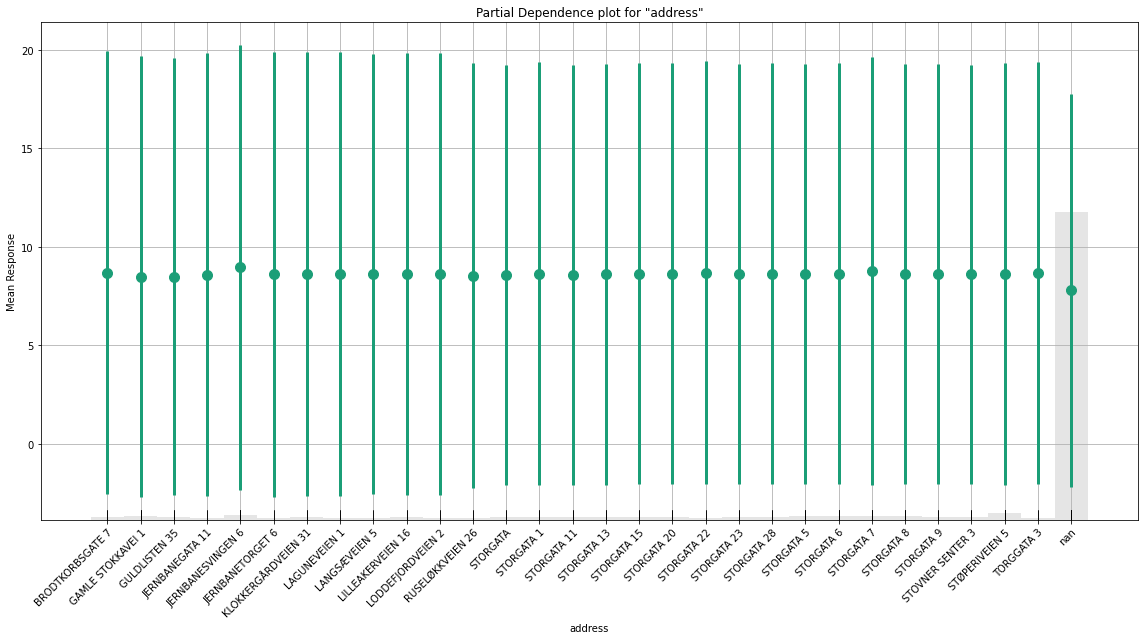

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a67dd409faa0d263823e7618479e4c55> was cancelled by the user.

<Figure size 1152x648 with 0 Axes>

In [25]:
best_model = aml.get_best_model()
aml.leader.explain(stores_train_hf)

In [26]:
m = h2o.get_model(lb[2,"model_id"])
print(m.varimp(use_pandas=True))



              variable  relative_importance  scaled_importance  percentage
0           chain_name         5.083509e+06           1.000000    0.483376
1   sales_channel_name         2.041494e+06           0.401591    0.194120
2  plaace_hierarchy_id         1.992548e+06           0.391963    0.189466
3            mall_name         6.153988e+05           0.121058    0.058516
4              address         2.690216e+05           0.052920    0.025580
5           geometry_x         1.726654e+05           0.033966    0.016418
6           geometry_y         1.450444e+05           0.028532    0.013792
7                  lat         8.454938e+04           0.016632    0.008040
8        grunnkrets_id         6.058118e+04           0.011917    0.005760
9                  lon         5.186179e+04           0.010202    0.004931


In [27]:
prediction = aml.leader.predict(stores_test_hf)
df = stores_test_hf.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "predicted"})
submission.to_csv("h2o_with_stores_train_only.csv", index = False)

submission

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Bowling alleys"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'address' has levels not trained on: ["17. MAI GATA 6", "4. STRØM TERRASSE 13", "A B AARSTENS GATE 4", "AAGAARDS PLASS 2", "AAGAARDVEIEN 177", "AARSTADGATEN 6", "AASGAARDEN 4", "ABEL MEYERS GATE 13", "ABELSBORG GATE 10", "ADMIRAL BØRRESENS VEI 6 E", ...4323 not listed..., "ØYEVOLLVEIEN 6", "ØYGARDEN 18", "ØYGARDSBAKKEN 13 A", "ØYJORDSVEIEN 1", "ØYRAGATA 9", "ØYRAPLASSEN 9", "ØYRO 17", "ØYRO 2", "ØYRO 39", "ØYVIND LAMBES VEI 6"]
  warnings.warn(w)
/Users/simenvoldq

,id,predicted
0,914206820-914239427-717245,5.671624
1,916789157-916823770-824309,7.834552
2,913341082-977479363-2948,5.854910
3,889682582-889697172-28720,8.714922
4,997991699-998006945-417222,20.971622
...,...,...
8572,917323003-917383529-844309,11.660807
8573,917353379-917411824-845904,5.594859
8574,917072302-917089248-833647,11.908312
8575,916960557-916993161-829908,4.922980
